In [4]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
import wave
plt.rcParams['figure.figsize']=[20,4]
plt.rcParams.update({'font.size':20})

In [8]:
base="./audio/"
sound_file = 'Sargam2.wav'
path=base+sound_file

In [9]:
ipd.Audio(path)

In [6]:
def SplitAudio(start,end,name,ogname,base):
    # times between which to extract the wave from
    start = start# seconds
    end = end # seconds 
    n=base+name+'.mp3'

    # file to extract the snippet from
    with wave.open(base+ogname, "rb") as infile:
        # get file data
        nchannels = infile.getnchannels()
        sampwidth = infile.getsampwidth()
        framerate = infile.getframerate()
        # set position in wave to start of segment
        infile.setpos(int(start * framerate))
        # extract data
        data = infile.readframes(int((end - start) * framerate))

    # write the extracted data to a new file
    with wave.open(n, 'w') as outfile:
        outfile.setnchannels(nchannels)
        outfile.setsampwidth(sampwidth)
        outfile.setframerate(framerate)
        outfile.setnframes(int(len(data) / sampwidth))
        outfile.writeframes(data)

In [7]:
SplitAudio(5.05,5.24,'saregAMAPA',sound_file,base)
# a1=base+'audio1.wav'
# a='violin-C6.wav'
# a='Sargam2.wav'

Error: file does not start with RIFF id

In [43]:
# SplitAudio(0.00,1.50,'sa1',a)

In [44]:
# a1='sa1.wav'

In [67]:
a1=base+a

In [68]:
ipd.Audio(a1)

In [69]:
voice1, sr1 = librosa.load(a1)

In [70]:
print("Duration of Audio : ",librosa.get_duration(voice1,sr1),"sec")

Duration of Audio :  14.14 sec


Text(0.5, 1.0, 'Time Domain')

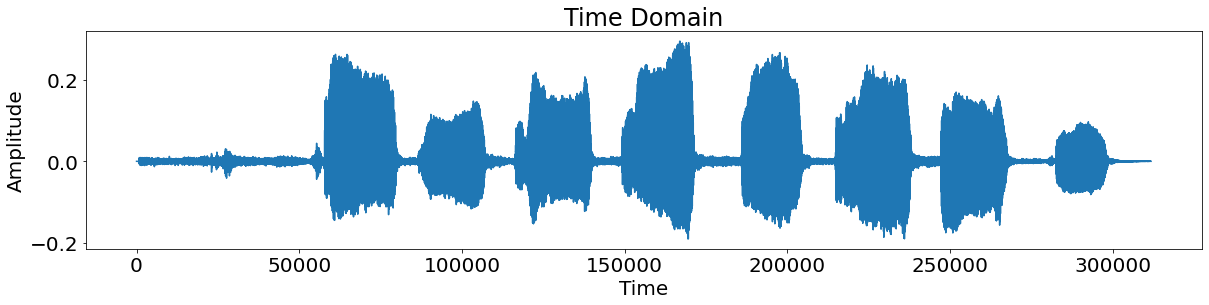

In [71]:
plt.plot(voice1)
plt.xlabel('Time') 
plt.ylabel('Amplitude')
plt.title('Time Domain')

In [72]:
frame_length = 1024
hop_length = 512

In [73]:
rmse = librosa.feature.rms(voice1, frame_length=frame_length, hop_length=hop_length, center=True)[0]

In [74]:
frames = range(len(rmse))
t = librosa.frames_to_time(frames, sr=sr1, hop_length=hop_length)

In [75]:
zcr = librosa.feature.zero_crossing_rate(voice1, frame_length=frame_length, hop_length=hop_length, center=True)[0]
zcr.size

609

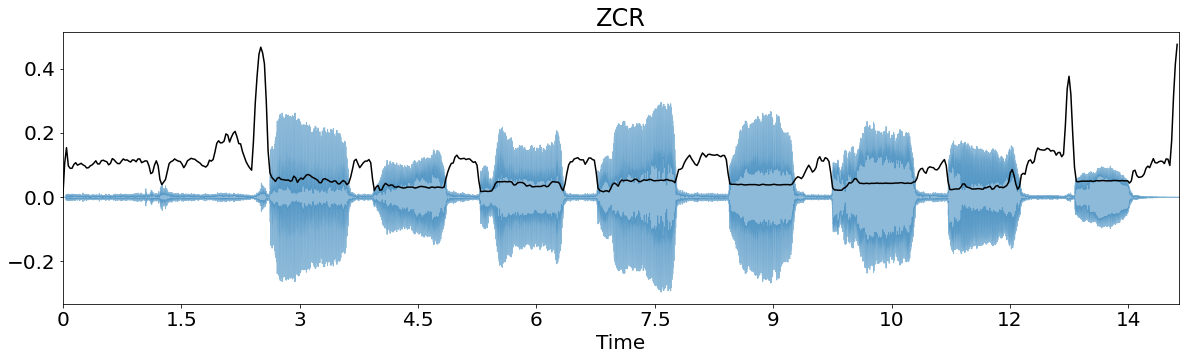

In [76]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(voice1, alpha=0.5)
plt.plot(t, zcr, color="black")
plt.title("ZCR")
plt.show()

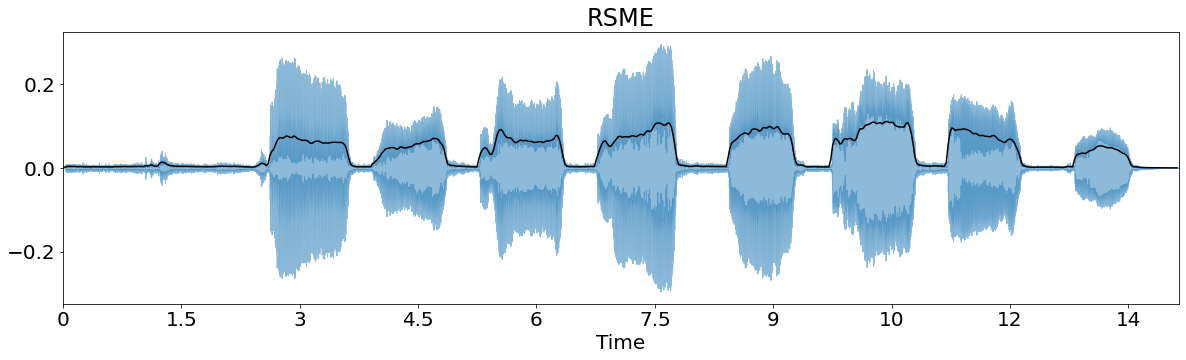

In [77]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(voice1, alpha=0.5)
plt.plot(t, rmse, color="black")
plt.title("RSME")
plt.show()

In [39]:
t[150]

3.4829931972789114

In [47]:
for i in range(150,200):
    if rmse[i]<0.003:
        print(i,rmse[i])

160 0.002840635
161 0.0028348344
162 0.0029739675
163 0.0028867587
165 0.0028947284
166 0.002841915
167 0.0027562699


In [ ]:
0.003

In [37]:
t[200]

4.6439909297052155

In [ ]:
SplitAudio(t[i],8.00,'audio1',sound_file,base)

In [59]:
!pip install pydub

In [102]:
li=set()
for i,j in enumerate(rmse):
    if j>0.015:
        start=t[i] 
        for x in range(i,len(rmse)):
            if rmse[x]<0.003:
                stop=t[x] 
                break
        SplitAudio(start,stop,'audiox',a,base)
        break
 
                
        

st 2.6238548752834467


In [116]:

voic, s = librosa.load('sargam2.wav')

In [140]:
ipd.Audio('sargam1.wav')

Text(0.5, 1.0, 'Time Domain')

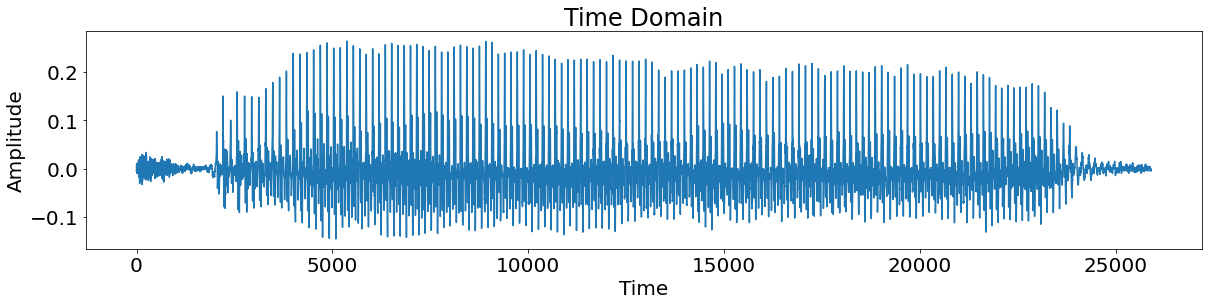

In [113]:
plt.plot(voic)
plt.xlabel('Time') 
plt.ylabel('Amplitude')
plt.title('Time Domain')

In [11]:
#Importing library and thir function
from pydub import AudioSegment
from pydub.silence import split_on_silence
import shutil,os 

#reading from audio mp3 file
sound = AudioSegment.from_wav(path)

# spliting audio files
audio_chunks = split_on_silence(sound, min_silence_len=200, silence_thresh=-40 )

#loop is used to iterate over the output list
for i, chunk in enumerate(audio_chunks):
    output_file = "sargam{0}.wav".format(i)
    print("Exporting file", output_file) 
#     chunk.export(output_file, format="wav")
#     dir = "Split/"
#     file_path = dir + output_file
#     shutil.move(file_path, output_file)

Exporting file sargam0.wav
Exporting file sargam1.wav
Exporting file sargam2.wav
Exporting file sargam3.wav
Exporting file sargam4.wav
Exporting file sargam5.wav
Exporting file sargam6.wav
Exporting file sargam7.wav


In [50]:
def limitFreq(freq,size):
    for i,j in enumerate(freq):
        if j>size:
            return i
            break

16667
572.0790044217239


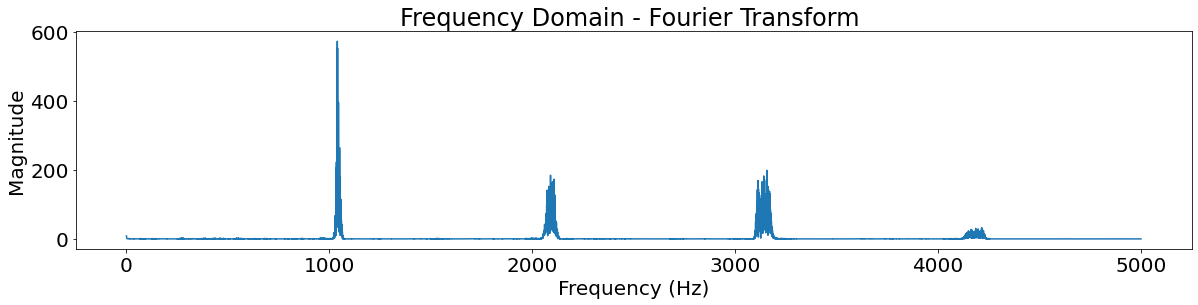

In [51]:


n=len(voice1)
X = np.fft.fft(voice1)
X_mag1 = np.absolute(X)
f1 = np.linspace(0, sr1, len(X_mag1))
f_bins1=limitFreq(f1,5000)
print(f_bins1)   
plt.plot(f1[1:f_bins1], X_mag1[1:f_bins1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ')
print(max(X_mag1[1:f_bins1])) 
plt.show()   


In [52]:

def remove_till_limit(Xaxis,limit,maxBins):
    newX=[]
    for i in Xaxis[:maxBins]:
        if i<limit:
            newX.append(0)
        else:
            newX.append(i)
    return newX
        

In [53]:
newX_mag1=remove_till_limit(X_mag1,500,f_bins1)

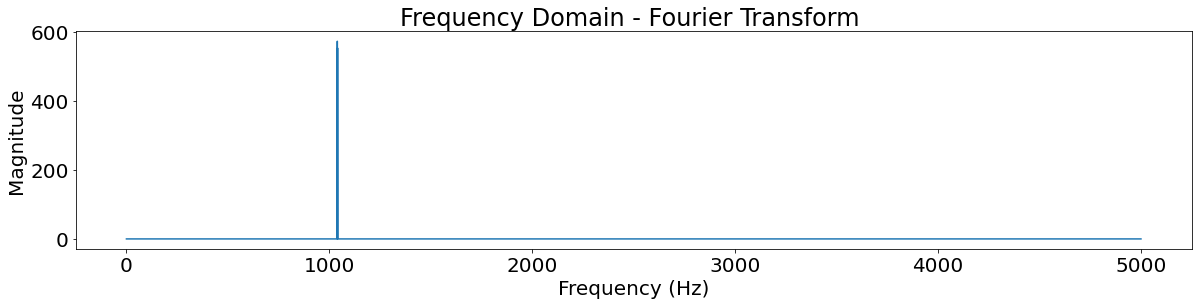

In [54]:
plt.plot(f1[1:f_bins1], newX_mag1[1:f_bins1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ') 
plt.show()    

In [55]:
def getFundamental(Xaxis,bins):
    for i,j in enumerate(Xaxis[1:bins]):
        if j>0:
            return i

In [81]:
fund=f1[getFundamental(newX_mag1,f_bins1)]

In [82]:
print(f"Fundamental Frequency is {round(fund)} Hz") 

Fundamental Frequency is 1039 Hz


In [83]:
def getIndexofFunda(f,funda):
    for i,j in enumerate(f):
        if j==funda:
            return i+1

In [85]:
newX_mag1[getIndexofFunda(f1,fund)]

572.0790044217239

In [20]:
# 2nd
SplitAudio(9.00,12.00,'audio2',sound_file,base)
a2=base+'audio2.wav'

In [21]:
ipd.Audio(a2)

Text(0.5, 1.0, 'Time Domain')

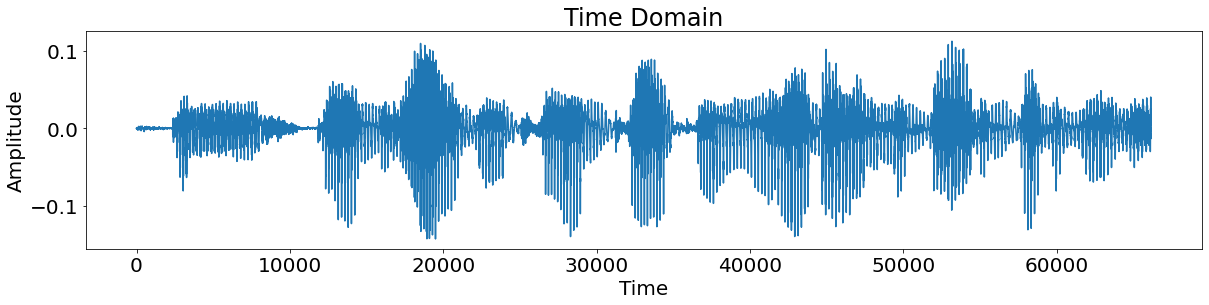

In [22]:
voice2, sr2 = librosa.load(a2)
plt.plot(voice2)
plt.xlabel('Time') 
plt.ylabel('Amplitude')
plt.title('Time Domain')

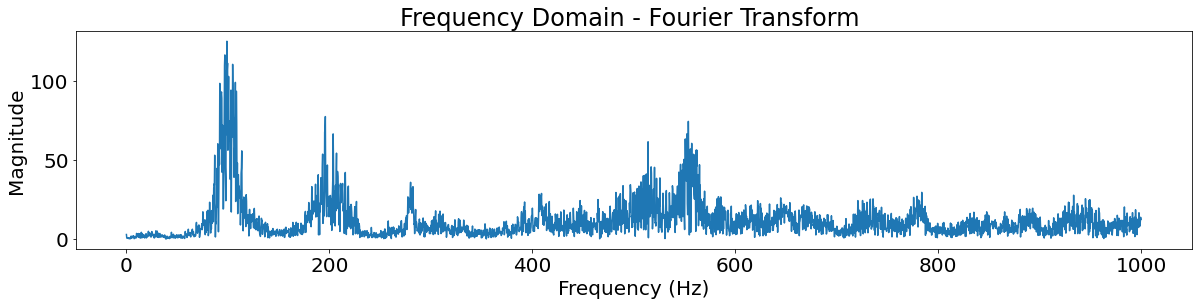

125.04745570189169


In [23]:
X2 = np.fft.fft(voice2) 
X_mag2 = np.absolute(X2)
f2 = np.linspace(0, sr2, len(X_mag2))
f_bins2=limitFreq(f2,1000)  
plt.plot(f2[:f_bins2], X_mag2[:f_bins2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ')
# x,y=plt.xlim() 
plt.show()   
print(max(X_mag2[:f_bins2])) 

In [24]:
newX_mag2=remove_till_limit(X_mag2,60,f_bins2)

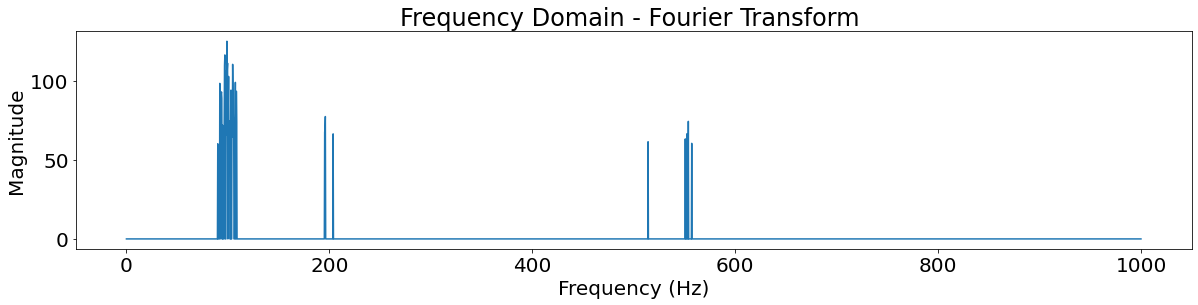

In [25]:
plt.plot(f2[:f_bins2], newX_mag2[:f_bins2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ') 
plt.show() 

In [26]:
print(f"Fundamental Frequency is {round(f2[getFundamental(newX_mag2,f_bins2)])} Hz") 

Fundamental Frequency is 90 Hz


In [74]:
# 3rd
SplitAudio(12.50,16.50,'audio3',sound_file,base)
a3=base+'audio3.wav'
ipd.Audio(a3)

length is 88200  & Sampling rate is 22050


Text(0.5, 1.0, 'Time Domain')

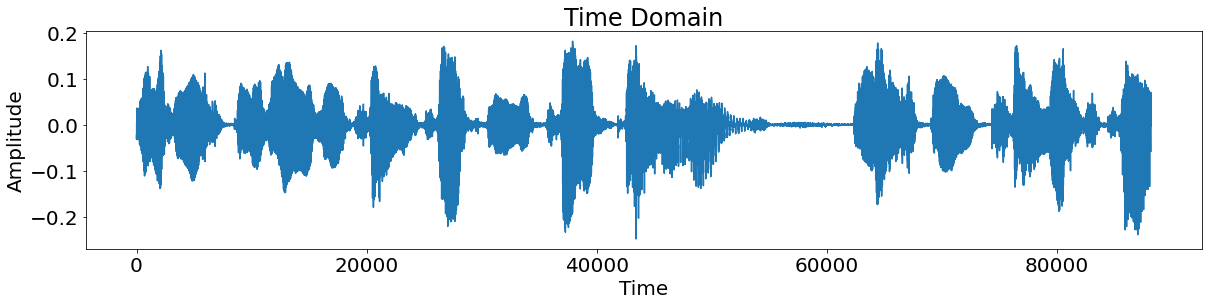

In [75]:
voice3, sr3 = librosa.load(a3)
print("length is",len(voice3)," & Sampling rate is",sr3)
plt.plot(voice3)
plt.xlabel('Time') 
plt.ylabel('Amplitude')
plt.title('Time Domain')

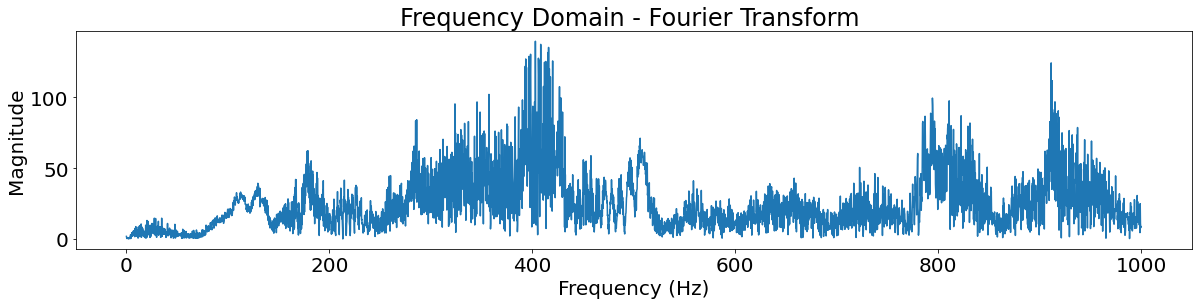

125.04745570189169


In [76]:
X3 = np.fft.fft(voice3) 
X_mag3 = np.absolute(X3)
f3 = np.linspace(0, sr3, len(X_mag3))
f_bins3=limitFreq(f3,1000)  
plt.plot(f3[:f_bins3], X_mag3[:f_bins3])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ')
# x,y=plt.xlim() 
plt.show()   
print(max(X_mag2[:f_bins3])) 

In [77]:
newX_mag3=remove_till_limit(X_mag3,100,f_bins3)

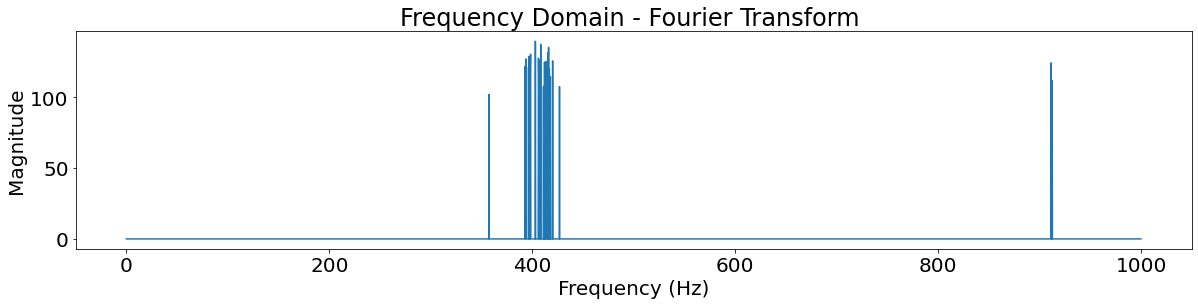

In [78]:
plt.plot(f3[:f_bins3], newX_mag3[:f_bins3])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain - Fourier Transform ') 
plt.show() 

In [ ]:
for i in f3:
    if i>0:
        print(i)
        

In [79]:
funda=f3[getFundamental(newX_mag3,f_bins3)]

In [62]:
funda

357.0040476649395

In [63]:
print(f"Fundamental Frequency is {round(funda)} Hz") 

Fundamental Frequency is 357 Hz


# Random

In [33]:
import crepe

In [34]:
import crepe
from scipy.io import wavfile

In [35]:
sr, audio = wavfile.read('./audio/violin-C6.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True,step_size=100)

2/2 [==============================] - 1s 52ms/step


In [36]:
confidence

array([0.06864962, 0.95769256, 0.95900977, 0.9617503 , 0.9542031 ,
       0.9550265 , 0.95189244, 0.9540919 , 0.95972955, 0.95925045,
       0.9567065 , 0.95638776, 0.95850885, 0.95350856, 0.9513464 ,
       0.96060145, 0.9616962 , 0.9508324 , 0.953055  , 0.9560131 ,
       0.95959496, 0.96057105, 0.9523802 , 0.9562713 , 0.95924544,
       0.9586816 , 0.95257926, 0.9533586 , 0.95625424, 0.95072746,
       0.96158445, 0.9516833 , 0.9489002 , 0.951213  ], dtype=float32)

In [37]:
lis=[]
for i,j in enumerate(confidence): 
    if j > 0.92:
        lis.append(i)


In [38]:
val=[frequency[i] for i in lis]

In [58]:
print("Fundamental Frequency (Pitch) is ",sum(val)/len(val))

Fundamental Frequency (Pitch) is  1043.7630451566893
